In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [19]:
data = read.csv('data/dailykos.csv.xz') #, header=F)
#dataMatrix = as.matrix(data)
#dataVector = as.vector(dataMatrix)

In [17]:
#str(data)

In [7]:
#distances = dist(dataMatrix, method='euclidean')

Warning message:
In dist(dataMatrix, method = "euclidean"): NAs introduced by coercion

In [18]:
distances = dist(data, method='euclidean')
#str(data)

In [20]:
clusters = hclust(distances, method='ward.D')

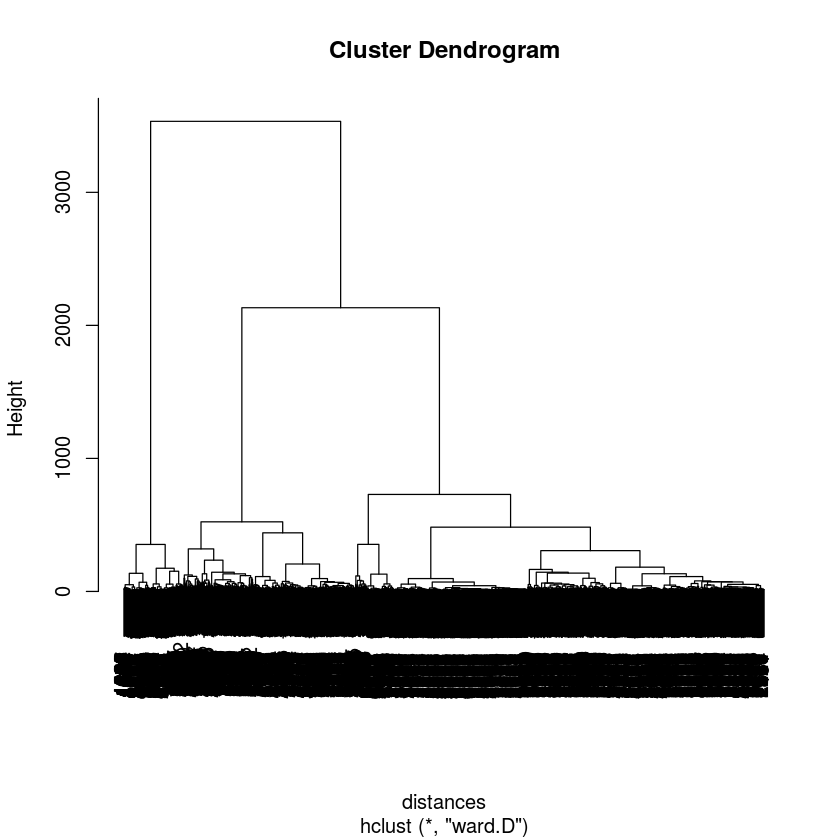

In [21]:
plot(clusters)

In [22]:
k=7
cut = cutree(clusters, k=k)

In [24]:
ds1 = subset(data, cut==1)
ds2 = subset(data, cut==2)
ds3 = subset(data, cut==3)
ds4 = subset(data, cut==4)
ds5 = subset(data, cut==5)
ds6 = subset(data, cut==6)
ds7 = subset(data, cut==7)

In [27]:
nrow(ds3)
for (i in 1:7) {
    print(paste(i, nrow(subset(data, cut==i))))
}

[1] 14

[1] "1 163"
[1] "2 27"
[1] "3 14"
[1] "4 11"
[1] "5 3"
[1] "6 3"
[1] "7 1"


In [28]:
table(cut)

cut
   1    2    3    4    5    6    7 
1266  321  374  139  407  714  209 

In [30]:
hier = split(data, cut)

In [33]:
#hier[[1]]

In [38]:
tail(sort(colMeans(ds1)))

vote        war republican      kerry   democrat       bush 
  1.220859   1.282209   1.570552   1.607362   1.889571   3.300613

In [39]:
tail(sort(colMeans(ds2)))

republican   presided   democrat        cut      kerry       bush 
  1.259259   1.851852   1.888889   2.000000   2.074074   6.222222

In [40]:
tail(sort(colMeans(ds3)))
tail(sort(colMeans(ds4)))
tail(sort(colMeans(ds5)))
tail(sort(colMeans(ds6)))
tail(sort(colMeans(ds7)))

year presided      tax      cut    state     bush 
2.000000 2.285714 2.642857 3.000000 3.285714 6.285714

presided      job     plan      cut      tax     bush 
2.363636 2.454545 2.454545 4.000000 4.272727 4.909091

political      bush     spend   deficit       cut       tax 
 3.000000  3.333333  3.666667  4.333333  5.000000  8.333333

november        tax industrial        car        cut       bush 
  3.333333   4.333333   4.666667   5.000000   6.000000   8.333333

percent project    year    bush  budget   spend 
      7       8       8      10      11      13

In [42]:
set.seed(1000)
kmc = kmeans(data, centers = k)

In [46]:
k1 = subset(data, kmc$cluster==1)
k2 = subset(data, kmc$cluster==2)
k3 = subset(data, kmc$cluster==3)
k4 = subset(data, kmc$cluster==4)
k5 = subset(data, kmc$cluster==5)
k6 = subset(data, kmc$cluster==6)
k7 = subset(data, kmc$cluster==7)

In [47]:
nrow(k3)

[1] 277

In [48]:
table(kmc$cluster)


   1    2    3    4    5    6    7 
 146  144  277 2063  163  329  308 

In [49]:
kc = split(data, kmc$cluster)

In [52]:
tail(sort(colMeans(k1)))
tail(sort(colMeans(k2)))
tail(sort(colMeans(k3)))
tail(sort(colMeans(k4)))
tail(sort(colMeans(k5)))
tail(sort(colMeans(k6)))
tail(sort(colMeans(k7)))

state           iraq          kerry administration       presided 
      1.609589       1.616438       1.636986       2.664384       2.767123 
          bush 
     11.431507

primaries  democrat    edward     clark     kerry      dean 
 2.319444  2.694444  2.798611  3.090278  4.979167  8.277778

administration          iraqi       american           bush            war 
      1.389892       1.610108       1.685921       2.610108       3.025271 
          iraq 
      4.093863

elect republican      kerry       poll   democrat       bush 
 0.6010664  0.6175473  0.6495395  0.7474552  0.7891420  1.1473582

race     senate      state    parties republican   democrat 
  2.484663   2.650307   3.521472   3.619632   4.638037   6.993865

democrat      bush challenge      vote      poll  november 
 2.899696  2.960486  4.121581  4.446809  4.872340 10.370821

presided    voter campaign     poll     bush    kerry 
1.324675 1.334416 1.383117 2.788961 5.970779 6.480519

In [53]:
table(cut, kmc$cluster)

   
cut    1    2    3    4    5    6    7
  1    3   11   64 1045   32    0  111
  2    0    0    0    0    0  320    1
  3   85   10   42   79  126    8   24
  4   10    5    0    0    1    0  123
  5   48    0  171  145    3    1   39
  6    0    2    0  712    0    0    0
  7    0  116    0   82    1    0   10